# Proyek Analisis Data: Nama dataset
- Nama: Lutfiarani Safitri
- Email: lutfiaranis@gmail.com
- Id Dicoding: lutfiarani

## Menentukan Pertanyaan Bisnis

1. Bagaimana performa sharing sepeda selama tahun 2012?
2. Di Bulan apa sharing sepeda tertinggi dan terendah terjadi untuk tahun 2012?
3. Di hari libur di tahun 2012, berapa rata-rata orang-orang sharing sepeda setiap jamnya?

## Menyiapkan semua library yang dibutuhkan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [6]:
#menilai data day
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
print(day_df.duplicated().sum())


0


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
#menilai data hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
print(hour_df.duplicated().sum())

0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [12]:
#mengganti dteday dari object menjadi datetime di tabel day
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])


In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
#mengganti dteday di tabel hour menjadi datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])


In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore data day

In [16]:
day_df.describe(include="all")

<ipython-input-16-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Eksplor data day untuk melihat banyaknya sewa per bulan

In [17]:
day_df.groupby(by=["yr","mnth"]).cnt.sum()

yr  mnth
0   1        38189
    2        48215
    3        64045
    4        94870
    5       135821
    6       143512
    7       141341
    8       136691
    9       127418
    10      123511
    11      102167
    12       87323
1   1        96744
    2       103137
    3       164875
    4       174224
    5       195865
    6       202830
    7       203607
    8       214503
    9       218573
    10      198841
    11      152664
    12      123713
Name: cnt, dtype: int64

In [18]:
day_df["mnth_full"] = day_df["dteday"].dt.month_name()

### mencari jumlah peminjaman setiap bulan di tahun 2012

In [19]:

day_df.query("yr==1").groupby(by=["mnth_full"]).cnt.sum().sort_values(ascending=False)

mnth_full
September    218573
August       214503
July         203607
June         202830
October      198841
May          195865
April        174224
March        164875
November     152664
December     123713
February     103137
January       96744
Name: cnt, dtype: int64

### mencari musim apa sharing sepeda tertinggi biasa terjadi di setiap tahun

In [20]:
# day_df.query("yr==1").groupby(by=["weathersit"]).cnt.sum().sort_values(ascending=False)
day_df.groupby(["yr", "season"]).agg({
    "casual": "max",
    "registered":"max",
    "cnt": "max"
})

casual  registered   cnt
yr season                          
0  1         1424        2841  3239
   2         2355        4414  5805
   3         3065        4614  6043
   4         2397        4372  5511
1  1         3155        5315  7836
   2         3410        6456  8362
   3         3160        6917  8714
   4         3031        6946  8555

### Di hari libur di tahun 2012, di jam berapa kira-kira terbanyak orang-orang sharing sepeda

In [21]:
hour_df.query("yr==1 & holiday==1").groupby(["yr", "hr"]).agg({
    "casual": "mean",
    "registered":"mean",
    "cnt": "mean"
}).sort_values(by="cnt",ascending=False)

casual  registered         cnt
yr hr                                    
1  17   82.090909  270.636364  352.727273
   13  113.181818  233.636364  346.818182
   18   64.636364  266.272727  330.909091
   12  104.272727  226.363636  330.636364
   14  111.272727  217.545455  328.818182
   16   94.181818  218.636364  312.818182
   15   95.090909  211.636364  306.727273
   11  103.181818  190.090909  293.272727
   19   52.545455  214.363636  266.909091
   10   76.181818  159.000000  235.181818
   20   51.818182  169.181818  221.000000
   8    27.000000  184.636364  211.636364
   9    47.818182  155.090909  202.909091
   21   38.636364  132.727273  171.363636
   22   29.000000  100.090909  129.090909
   7     8.454545   95.363636  103.818182
   23   10.272727   57.181818   67.454545
   0    11.909091   45.636364   57.545455
   1     7.545455   31.909091   39.454545
   6     4.000000   31.545455   35.545455
   2     7.181818   20.000000   27.181818
   3     3.000000   10.000000   13.000000
   5     2.090909   10.636364   12.727273
   4     1.800000    4.800000    6.600000

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa banyak jumlah peminjaman setiap bulan di tahun 2012, dan bulan apa terdapat peminjaman terbanyak?

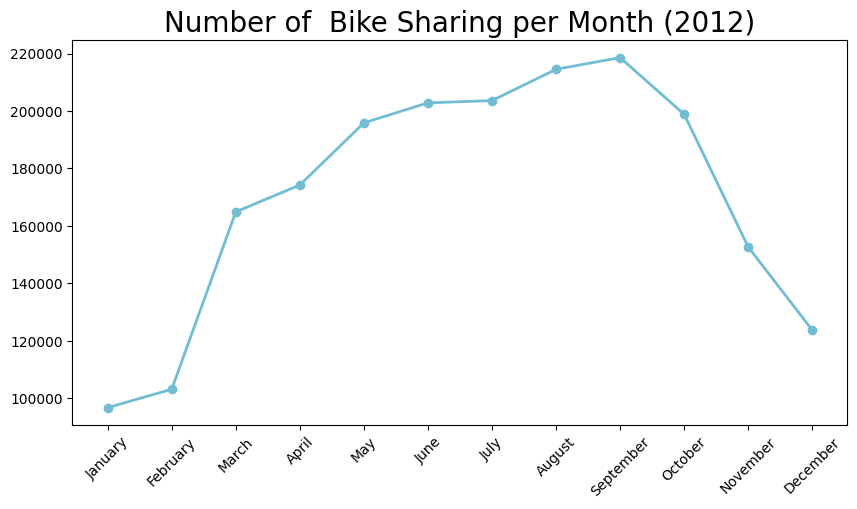

In [22]:
monthly_share_df = day_df.query("yr==1").groupby(by=["mnth","mnth_full"]).cnt.sum()
monthly_share_df = monthly_share_df.reset_index()
monthly_share_df.rename(columns={
    "mnth": "bulan_angka",
    "mnth_full": "bulan",
    "cnt": "sharing_count"
}, inplace=True)
monthly_share_df.head(12)
plt.figure(figsize=(10, 5))
plt.plot(monthly_share_df["bulan"], monthly_share_df["sharing_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of  Bike Sharing per Month (2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()


### Pertanyaan 2: di bulan apa saja terjadi sharing sepeda tertinggi dan terendah untuk tahun 2012?

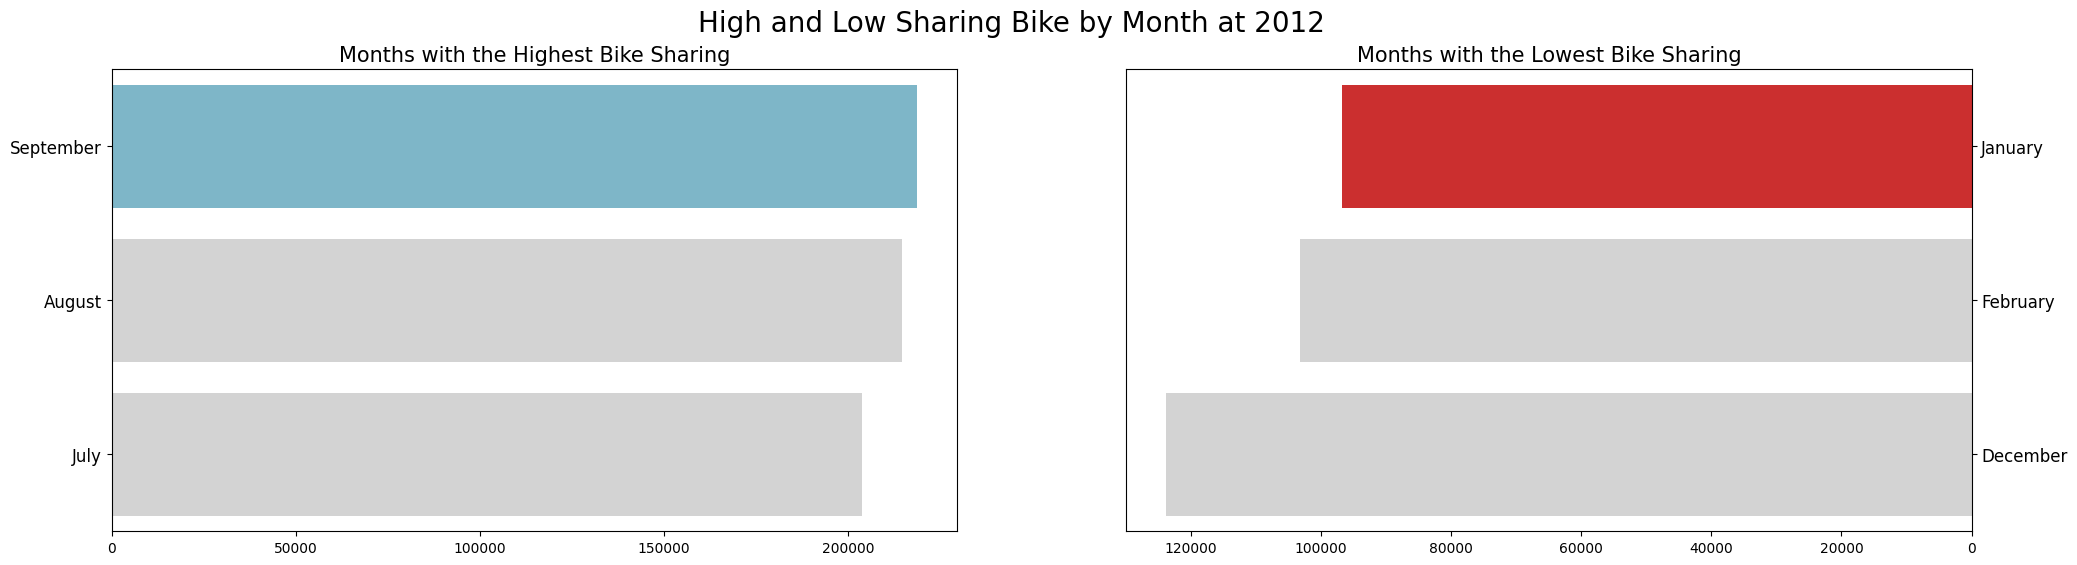

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
colors_worst = ["#E51515", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="sharing_count", y="bulan", data=monthly_share_df.sort_values(by="sharing_count", ascending=False).head(3), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Months with the Highest Bike Sharing", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="sharing_count", y="bulan", data=monthly_share_df.sort_values(by="sharing_count", ascending=True).head(3), palette=colors_worst, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Months with the Lowest Bike Sharing", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("High and Low Sharing Bike by Month at 2012", fontsize=20)
plt.show()

###Pertanyaan 3: Di hari libur di tahun 2012, berapa rata-rata orang-orang sharing sepeda setiap jamnya?

In [24]:
hour_data_df = hour_df.query("yr==1 & holiday==1").groupby(["yr", "hr"]).agg({
    "casual": "mean",
    "registered":"mean",
    "cnt": "mean"
}).sort_values(by="cnt",ascending=False)
hour_data_df = hour_data_df.reset_index()
hour_data_df.rename(columns={
    "hr": "hour",
    "cnt": "qty"
}, inplace=True)
hour_data_df

hour_holiday_df = hour_df.query("yr==1 & holiday==1").agg({
    "casual": "mean",
    "registered":"mean",
    "cnt": "mean"
})
hour_holiday_df


casual         48.318008
registered    137.172414
cnt           185.490421
dtype: float64

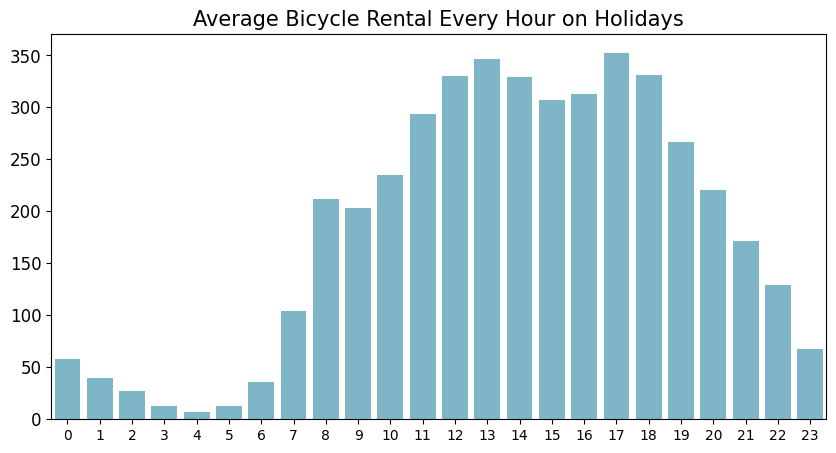

In [25]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
sns.barplot(
    x="hour",
    y="qty",
    data=hour_data_df.sort_values(by="qty", ascending=False),
    palette=colors_
)
plt.title("Average Bicycle Rental Every Hour on Holidays", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### RFM Analysis

In [26]:
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="dteday",
    right_on="dteday"
)
all_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Menghitung recency, frequency, intensity, dan RFI score
### Recency = seberapa terkini aktifitas tersebut terjadi
### Frequency = Seberapa sering sepeda disewa dalam satu hari
### Intensity = Penghitungan rata-rata sepeda disewa dalam satu hari
### RFI adalah Recency, Frequency, Intensity

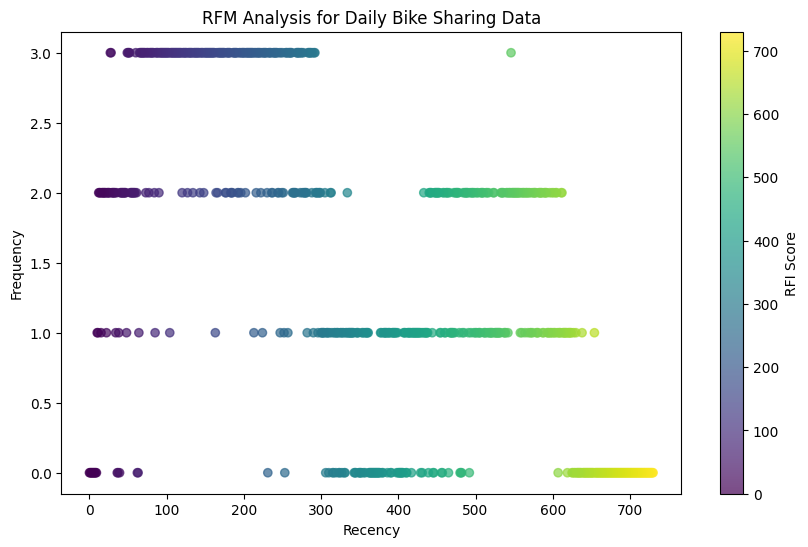

In [27]:
# menghitung Recency, Frequency, intensity, dan score RFI
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
latest_date = day_df['dteday'].max()
day_df['recency'] = (latest_date - day_df['dteday']).dt.days

frequency_bins = pd.qcut(day_df['cnt'], q=[0, 0.25, 0.5, 0.75, 1], labels=False, duplicates='drop')
day_df['frequency'] = frequency_bins

average_intensity = day_df['cnt'].mean()
day_df['intensity'] = pd.cut(day_df['cnt'], bins=[0, average_intensity, float('inf')], labels=[0, 1])

# Convert tipe data categorikal menjadi integer
day_df['frequency'] = day_df['frequency'].astype(int)
day_df['intensity'] = day_df['intensity'].astype(int)

# menghitung RFI score
day_df['rfi_score'] = day_df['recency'] + day_df['frequency'] + day_df['intensity']

plt.figure(figsize=(10, 6))
scatter = plt.scatter(day_df['recency'], day_df['frequency'], c=day_df['rfi_score'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='RFI Score')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('RFM Analysis for Daily Bike Sharing Data')
plt.show()


## Conclusion

1. Bagaimana performa sharing sepeda selama tahun 2012?
- ada kenaikan dari january sampai september, namun terjadi penurunan di oktober hingga desember. Hal ini bisa disebabkan karena sudah memasuki musim salju sehingga orang-orang lebih berhati-hati untuk tidak menggunakan sepeda karena takut tergelincir
2. Di Bulan apa sharing sepeda tertinggi dan terendah terjadi untuk tahun 2012?
- sharing sepeda tertinggi terjadi di bulan september
sedangkan terendah di bulan Januari
3. Di hari libur di tahun 2012, berapa rata-rata orang-orang sharing sepeda setiap jamnya?
- sharing setiap jam rata-rata berada di kuantiti 185, dengan casual 48 dan registered 185
- untuk jam dengan sharing tertinggi rata-rata berada di pukul 17